In [96]:
 import requests
from bs4 import BeautifulSoup as bs

# Make an HTTP GET request to the Wikipedia page
url = "https://www.airlinequality.com/airline-reviews/qantas-airways"
r = requests.get(url)
# Check if the request was successful
if r.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = bs(r.content, "html.parser")

    # Print the prettified HTML content
    #contents = soup.prettify()
    #print(contents)

    # Find all elements with the class "review-ratings"
    info_box = soup.find_all(class_="body")
    print(info_box)
else:
    print("Failed to retrieve the web page.")

[<div class="body" id="anchor879061">
<h2 class="text_header">"I've said I wouldn't fly Qantas"</h2>
<h3 class="text_sub_header userStatusWrapper">
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<span itemprop="name">Janet McCarthy</span></span> (Australia) <time datetime="2023-11-06" itemprop="datePublished">6th November 2023</time></h3>
<div class="tc_mobile">
<div class="text_content" itemprop="reviewBody">✅ <strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Trip Verified</em></a></strong> |  We flew Qantas SYD-BKK the transferred to Finnair BKK-CPH via HEL. the Finnair flight was the worst we've ever experienced after 50 years of flying. Finnair CPH-SIN via HEL was only marginally better with a Singaporean crew. So we were horrified to discover that QF82, SIN-SYD, has been changed to QF292 on a Finnair plane manned by a Finnair crew. For those people who complain about Qantas I can only say try Finnair to see how good Qantas is. I've s

In [97]:
import requests
from bs4 import BeautifulSoup as bs

# Make an HTTP GET request to the website
url = "https://www.airlinequality.com/airline-reviews/qantas-airways"
r = requests.get(url)

# Check if the request was successful
if r.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = bs(r.content, "html.parser")

    # Find all elements with the class "body"
    reviews = soup.find_all(class_="body")

    for review in reviews:
        # Extract the ID from the 'div' tag's 'id' attribute
        review_id = review.get('id').replace('anchor', '')

        # Extract the customer's name
        customer_name = review.find('span', itemprop='name').get_text(strip=True)
        
        # Extract the review text header
        title = review.find('h2', class_='text_header').get_text(strip=True)

        # Extract the text of the customer's review
        review_text = review.find('div', class_='text_content').get_text(strip=True)

        # Extract the date
        date = review.find('time', itemprop='datePublished').get_text(strip=True)

        # Extract Type Of Traveller
        type_of_traveller_elem = review.find('td', class_='review-rating-header', text='Type Of Traveller')
        type_of_traveller = type_of_traveller_elem.find_next('td', class_='review-value').get_text(strip=True) if type_of_traveller_elem else ""

        # Extract Seat Type
        seat_type_elem = review.find('td', class_='review-rating-header', text='Seat Type')
        seat_type = seat_type_elem.find_next('td', class_='review-value').get_text(strip=True) if seat_type_elem else ""

        # Extract Route
        route_elem = review.find('td', class_='review-rating-header', text='Route')
        route = route_elem.find_next('td', class_='review-value').get_text(strip=True) if route_elem else ""

        # Extract Date Flown
        date_flown_elem = review.find('td', class_='review-rating-header', text='Date Flown')
        date_flown = date_flown_elem.find_next('td', class_='review-value').get_text(strip=True) if date_flown_elem else ""
        
        # Extract Seat Comfort
        seat_comfort_elem = review.find('td', class_='review-rating-header seat_comfort')
        if seat_comfort_elem:
            seat_comfort = seat_comfort_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = seat_comfort.find_all('span', class_='star fill')
            num_seat_comfort_stars = len(filled_stars)
        else:
            seat_comfort = ""
            num_seat_comfort_stars = 0
            
            # Extract Cabin Staff
        cabin_staff_elem = review.find('td', class_='review-rating-header cabin_staff_service')
        if cabin_staff_elem:
            cabin_staff = cabin_staff_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = cabin_staff.find_all('span', class_='star fill')
            num_cabin_staff_stars = len(filled_stars)
        else:
            cabin_staff = ""
            num_cabin_staff_stars = 0
            
            # Extract food_and_beverages
        food_and_beverages_elem = review.find('td', class_='review-rating-header food_and_beverages')
        if food_and_beverages_elem:
            food_and_beverages = food_and_beverages_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = food_and_beverages.find_all('span', class_='star fill')
            num_food_and_beverages_stars = len(filled_stars)
        else:
            food_and_beverages = ""
            num_food_and_beverages_stars = 0
            
            # Extract Inflight Entertainment
        inflight_entertainment_elem = review.find('td', class_='review-rating-header inflight_entertainment')
        if inflight_entertainment_elem:
            inflight_entertainment = inflight_entertainment_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = inflight_entertainment.find_all('span', class_='star fill')
            num_inflight_entertainment_stars = len(filled_stars)
        else:
            inflight_entertainment = ""
            num_inflight_entertainment_stars = 0
            
            # Extract Ground Service
        ground_service_elem = review.find('td', class_='review-rating-header ground_service')
        if ground_service_elem:
            ground_service = ground_service_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = ground_service.find_all('span', class_='star fill')
            num_ground_service_stars = len(filled_stars)
        else:
            ground_service = ""
            num_ground_service_stars = 0
            
            # Extract Value for Money
        value_for_money_elem = review.find('td', class_='review-rating-header value_for_money')
        if value_for_money_elem:
            value_for_money = value_for_money_elem.find_next('td', class_='review-rating-stars stars')
            filled_stars = value_for_money.find_all('span', class_='star fill')
            num_value_for_money_stars = len(filled_stars)
        else:
            value_for_money = ""
            num_value_for_money_stars = 0
            
            # Extract Recommended
        recommended_elem = review.find('td', class_='review-rating-header recommended', text='Recommended')
        recommended = recommended_elem.find_next('td', class_='review-value').get_text(strip=True) if recommended_elem else ""


           
            
            
            

        # Print the extracted data
        print("ID:", review_id)
        print("Customer Name:", customer_name)
        print("Review Title:", title)
        print("Review Text:", review_text)
        print("Date:", date)
        print("Type Of Traveller:", type_of_traveller)
        print("Seat Type:", seat_type)
        print("Route:", route)   
        print("Date Flown:", date_flown)
        print("Seat Comfort:", num_seat_comfort_stars)
        print("cabin staff service:", num_cabin_staff_stars)
        print("food and beverages:", num_food_and_beverages_stars)
        print("Inflight Entertainment:", num_inflight_entertainment_stars)
        print("Ground Service:", num_ground_service_stars)
        print("Value for Money:", num_value_for_money_stars)
        print("Recommended:",recommended)
        
        print("\n")
else:
    print("Failed to retrieve the web page.")


ID: 879061
Customer Name: Janet McCarthy
Review Title: "I've said I wouldn't fly Qantas"
Review Text: ✅Trip Verified|  We flew Qantas SYD-BKK the transferred to Finnair BKK-CPH via HEL. the Finnair flight was the worst we've ever experienced after 50 years of flying. Finnair CPH-SIN via HEL was only marginally better with a Singaporean crew. So we were horrified to discover that QF82, SIN-SYD, has been changed to QF292 on a Finnair plane manned by a Finnair crew. For those people who complain about Qantas I can only say try Finnair to see how good Qantas is. I've said I wouldn't fly Qantas. I would but never on this leg.
Date: 6th November 2023
Type Of Traveller: Couple Leisure
Seat Type: Economy Class
Route: Singapore to Sydney
Date Flown: November 2023
Seat Comfort: 3
cabin staff service: 3
food and beverages: 1
Inflight Entertainment: 3
Ground Service: 3
Value for Money: 1
Recommended: no


ID: 878766
Customer Name: Robert Clarke
Review Title: “least leg room on any plane”
Review Te

In [98]:
import requests
from bs4 import BeautifulSoup as bs

# Initialize a list to store the scraped data
all_reviews = []

# Loop through all 185 pages
for page_number in range(1, 185):
    # Update the URL for each page
    url = f"https://www.airlinequality.com/airline-reviews/qantas-airways/page/{page_number}"
    r = requests.get(url)

    # Check if the request was successful
    if r.status_code == 200:
        # Parse the HTML content with BeautifulSoup
        soup = bs(r.content, "html.parser")

        # Find all elements with the class "body"
        reviews = soup.find_all(class_="body")

        for review in reviews:
            # Extract the ID from the 'div' tag's 'id' attribute
            review_id = review.get('id').replace('anchor', '')

            # Extract the customer's name
            customer_name = review.find('span', itemprop='name').get_text(strip=True)
            # Extract the review text header
            title = review.find('h2', class_='text_header').get_text(strip=True)

            # Extract the text of the customer's review
            review_text = review.find('div', class_='text_content').get_text(strip=True)

            # Extract the date
            date = review.find('time', itemprop='datePublished').get_text(strip=True)

            # Extract Type Of Traveller
            type_of_traveller_elem = review.find('td', class_='review-rating-header', text='Type Of Traveller')
            type_of_traveller = type_of_traveller_elem.find_next('td', class_='review-value').get_text(strip=True) if type_of_traveller_elem else ""

            # Extract Seat Type
            seat_type_elem = review.find('td', class_='review-rating-header', text='Seat Type')
            seat_type = seat_type_elem.find_next('td', class_='review-value').get_text(strip=True) if seat_type_elem else ""

            # Extract Route
            route_elem = review.find('td', class_='review-rating-header', text='Route')
            route = route_elem.find_next('td', class_='review-value').get_text(strip=True) if route_elem else ""

            # Extract Date Flown
            date_flown_elem = review.find('td', class_='review-rating-header', text='Date Flown')
            date_flown = date_flown_elem.find_next('td', class_='review-value').get_text(strip=True) if date_flown_elem else ""
            
            # Extract Seat Comfort
            seat_comfort_elem = review.find('td', class_='review-rating-header seat_comfort')
            if seat_comfort_elem:
                seat_comfort = seat_comfort_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = seat_comfort.find_all('span', class_='star fill')
                num_seat_comfort_stars = len(filled_stars)
            else:
                seat_comfort = ""
                num_seat_comfort_stars = 0
                
            # Extract Cabin Staff
            cabin_staff_elem = review.find('td', class_='review-rating-header cabin_staff_service')
            if cabin_staff_elem:
                cabin_staff = cabin_staff_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = cabin_staff.find_all('span', class_='star fill')
                num_cabin_staff_stars = len(filled_stars)
            else:
                cabin_staff = ""
                num_cabin_staff_stars = 0
                
            # Extract food_and_beverages
            food_and_beverages_elem = review.find('td', class_='review-rating-header food_and_beverages')
            if food_and_beverages_elem:
                food_and_beverages = food_and_beverages_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = food_and_beverages.find_all('span', class_='star fill')
                num_food_and_beverages_stars = len(filled_stars)
            else:
                food_and_beverages = ""
                num_food_and_beverages_stars = 0
                
            # Extract Inflight Entertainment
            inflight_entertainment_elem = review.find('td', class_='review-rating-header inflight_entertainment')
            if inflight_entertainment_elem:
                inflight_entertainment = inflight_entertainment_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = inflight_entertainment.find_all('span', class_='star fill')
                num_inflight_entertainment_stars = len(filled_stars)
            else:
                inflight_entertainment = ""
                num_inflight_entertainment_stars = 0
                
            # Extract Ground Service
            ground_service_elem = review.find('td', class_='review-rating-header ground_service')
            if ground_service_elem:
                ground_service = ground_service_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = ground_service.find_all('span', class_='star fill')
                num_ground_service_stars = len(filled_stars)
            else:
                ground_service = ""
                num_ground_service_stars = 0
                
            # Extract Value for Money
            value_for_money_elem = review.find('td', class_='review-rating-header value_for_money')
            if value_for_money_elem:
                value_for_money = value_for_money_elem.find_next('td', class_='review-rating-stars stars')
                filled_stars = value_for_money.find_all('span', class_='star fill')
                num_value_for_money_stars = len(filled_stars)
            else:
                value_for_money = ""
                num_value_for_money_stars = 0
                
            # Extract Recommended
            recommended_elem = review.find('td', class_='review-rating-header recommended', text='Recommended')
            recommended = recommended_elem.find_next('td', class_='review-value').get_text(strip=True) if recommended_elem else ""
    
            # Append the extracted data to the list
            all_reviews.append({
                "ID": review_id,
                "Customer Name": customer_name,
                "Review Text": review_text,
                "Review Title": title,
                "Date": date,
                "Type Of Traveller": type_of_traveller,
                "Seat Type": seat_type,
                "Route": route,
                "Date Flown": date_flown,
                "Seat Comfort": num_seat_comfort_stars,
                "Cabin Staff Service": num_cabin_staff_stars,
                "Food and Beverages": num_food_and_beverages_stars,
                "Inflight Entertainment": num_inflight_entertainment_stars,
                "Ground Service": num_ground_service_stars,
                "Value for Money": num_value_for_money_stars,
                "Recommended": recommended
            })

    else:
        print(f"Failed to retrieve the web page for page {page_number}")

# Now you have all the scraped data in the 'all_reviews' list
# You can process, save, or analyze the data as needed
import csv

# Specify the CSV file name
csv_file = "airline_reviews.csv"

# Save the data to the CSV file
with open(csv_file, mode='w', newline='',  encoding='utf-8') as file:
    fieldnames = [
        "ID",
        "Customer Name",
        "Review Title",
        "Review Text",
        "Date",
        "Type Of Traveller",
        "Seat Type",
        "Route",
        "Date Flown",
        "Seat Comfort",
        "Cabin Staff Service",
        "Food and Beverages",
        "Inflight Entertainment",
        "Ground Service",
        "Value for Money",
        "Recommended"
    ]
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()  # Write the header row

    for review in all_reviews:
        writer.writerow(review)



In [99]:


import pandas as pd

csv_file = "airline_reviews.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file, encoding='utf-8')

# Display the first 10 rows of the DataFrame
print(df.head(10))


       ID   Customer Name                          Review Title  \
0  879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1  878766   Robert Clarke         “least leg room on any plane”   
2  878535    Steve Cooper         "nice food and great service"   
3  878518    Jon Vallance         "Qantas are an absolute joke"   
4  878512   Jane Thompson  "embarrassed at the quality of food"   
5  877437    Deborah Bolt          "Cabin cleanliness was poor"   
6  877138         L Beech             "More disgusting service"   
7  877125       Emma Rowe       "$100 refund for a $510 ticket"   
8  877037       G Schmitt              "Awful customer service"   
9  876355        J Pillay          “a disappointing experience”   

                                         Review Text               Date  \
0  ✅Trip Verified|  We flew Qantas SYD-BKK the tr...  6th November 2023   
1  Not Verified| If you are over 6'2 do not book ...  2nd November 2023   
2  Not Verified|  Qantas may not be e

In [100]:
# Get the data types of all columns
data_types = df.dtypes

# Print the data types
print(data_types)

ID                         int64
Customer Name             object
Review Title              object
Review Text               object
Date                      object
Type Of Traveller         object
Seat Type                 object
Route                     object
Date Flown                object
Seat Comfort               int64
Cabin Staff Service        int64
Food and Beverages         int64
Inflight Entertainment     int64
Ground Service             int64
Value for Money            int64
Recommended               object
dtype: object


In [103]:
# Add new columns for month and year
# Convert "Date Flown" column to datetime

df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')

# Extract the "Month" and "Year" columns
df['Month'] = df['Date Flown'].dt.month
df['Year'] = df['Date Flown'].dt.year

# Define default values for invalid dates
default_month = -1  # Replace invalid months with -1 (or any other default value)
default_year = -1   # Replace invalid years with -1 (or any other default value)

# Replace invalid months and years with default values
df['Month'] = df['Month'].fillna(default_month).astype(int)
df['Year'] = df['Year'].fillna(default_year).astype(int)

# Display the updated DataFrame
print(df[[ 'Month', 'Year','Seat Comfort','Cabin Staff Service','Food and Beverages','Inflight Entertainment','Ground Service', 'Value for Money' ]].head(10))

   Month  Year  Seat Comfort  Cabin Staff Service  Food and Beverages  \
0     11  2023             3                    3                   1   
1     11  2023             1                    4                   4   
2     10  2023             3                    4                   4   
3     10  2023             1                    2                   1   
4     10  2023             1                    2                   1   
5     10  2023             1                    4                   4   
6     10  2023             1                    2                   1   
7     10  2023             0                    0                   0   
8      4  2023             2                    3                   3   
9     10  2023             1                    1                   1   

   Inflight Entertainment  Ground Service  Value for Money  
0                       3               3                1  
1                       3               4                2  
2            

In [104]:
#Find number of rows in the file
num_rows = len(df)
print(num_rows)

1840


In [105]:
#Find which years we have an info for
unique_years = df['Year'].unique()

# Print the unique years
print(unique_years)


[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014   -1]


In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [107]:
print(df)

          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text                 Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr...    6th November 2023   

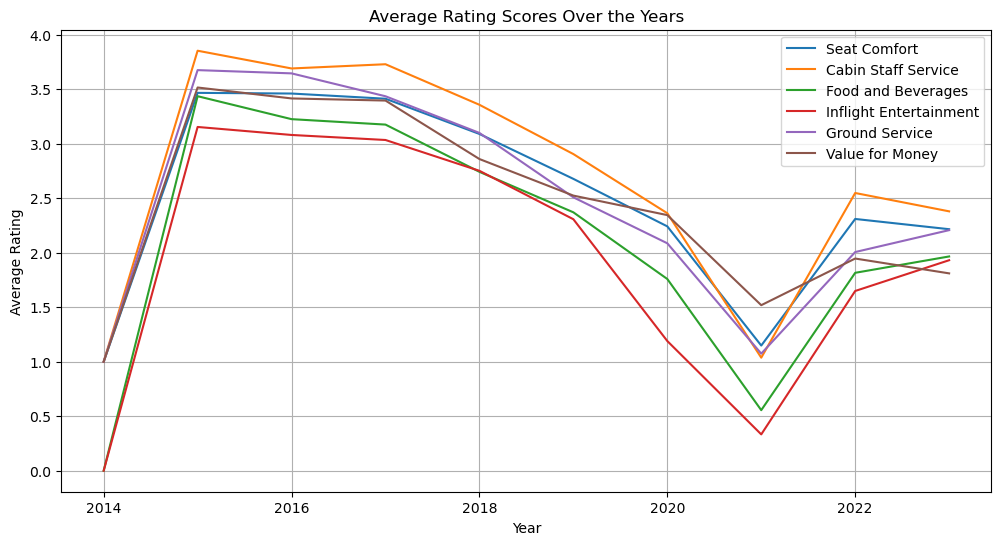

In [108]:
import pandas as pd

import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("airline_reviews.csv", encoding='utf-8')

# Convert "Date Flown" column to datetime
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')

# Extract the "Month" and "Year" columns
df['Month'] = df['Date Flown'].dt.month
df['Year'] = df['Date Flown'].dt.year

# Define the rating types you want to analyze
rating_types = ['Seat Comfort', 'Cabin Staff Service', 'Food and Beverages', 'Inflight Entertainment', 'Ground Service', 'Value for Money']

# Calculate the average rating score for each year
avg_rating_per_year = df.groupby('Year')[rating_types].mean()

# Create a line chart for average rating score per year
plt.figure(figsize=(12, 6))
for rating_type in rating_types:
    plt.plot(avg_rating_per_year.index, avg_rating_per_year[rating_type], label=rating_type)

# Set labels and a title
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Scores Over the Years')

# Show a legend
plt.legend()

# Show the line chart
plt.grid(True)
plt.show()


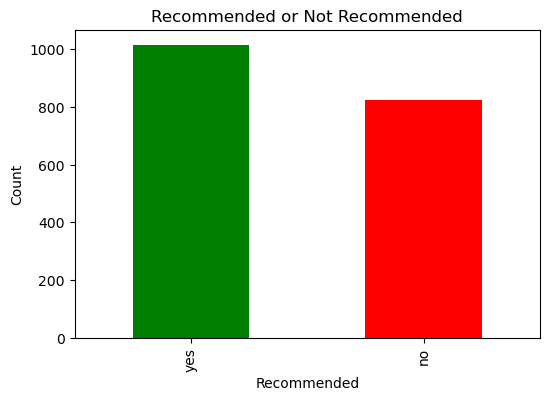

In [109]:

# Count the number of 'Recommended' values (e.g., 'Yes', 'No')
recommended_counts = df['Recommended'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
recommended_counts.plot(kind='bar', color=['green', 'red'])

# Set labels and a title
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.title('Recommended or Not Recommended')

# Show the bar chart
plt.show()

<Figure size 1200x600 with 0 Axes>

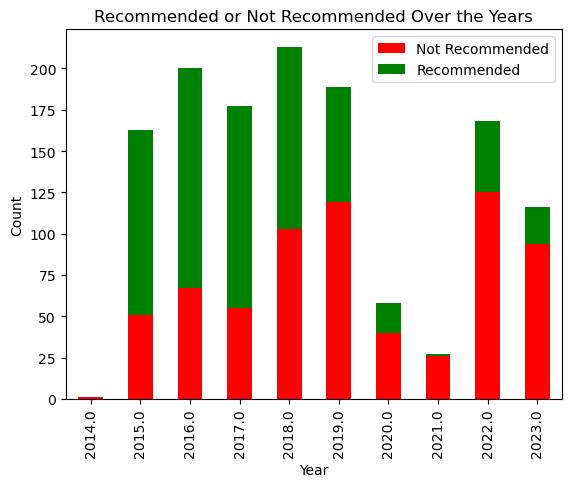

In [110]:


# Create a bar chart for 'Recommended' over the years
plt.figure(figsize=(12, 6))
recommended_by_year = df.groupby(['Year', 'Recommended']).size().unstack()
recommended_by_year.plot(kind='bar', stacked=True, color=['red', 'green'])

# Set labels and a title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Recommended or Not Recommended Over the Years')

# Show the legend
plt.legend(['Not Recommended', 'Recommended'])

# Show the bar chart
plt.show()






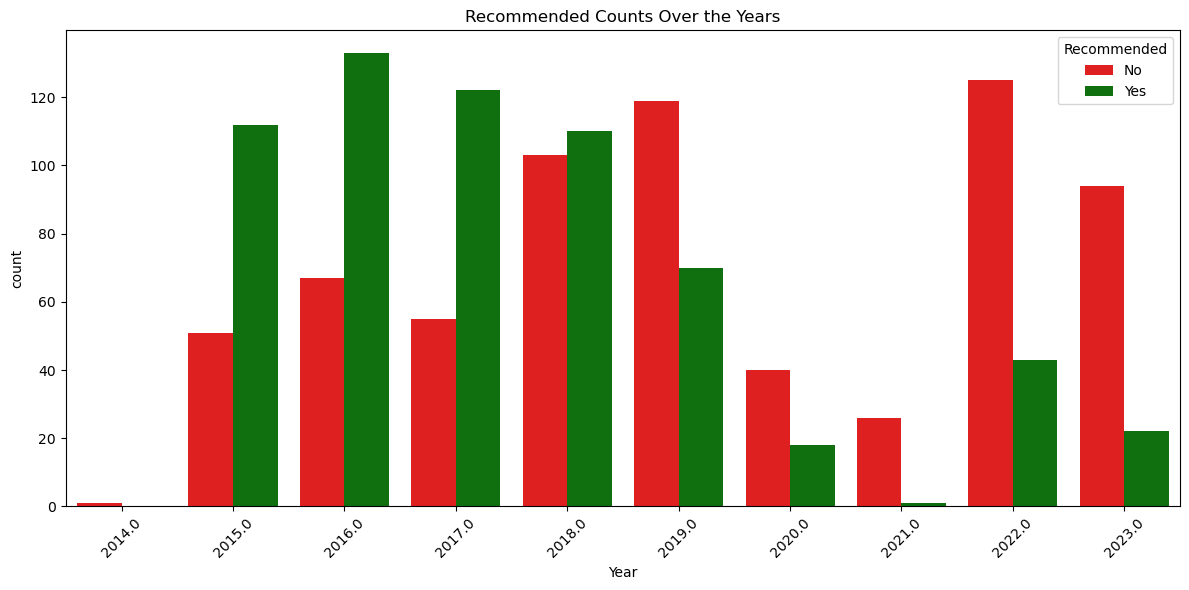

In [111]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("airline_reviews.csv", encoding='utf-8')

# Convert "Date Flown" column to datetime
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')

# Extract the "Year" column
df['Year'] = df['Date Flown'].dt.year

# Clean the 'Recommended' column to handle different variations
df['Recommended'] = df['Recommended'].str.lower().str.strip()
df['Recommended'] = df['Recommended'].apply(lambda x: 'Yes' if x == 'yes' else ('No' if x == 'no' else 'Other'))

# Define custom colors for 'Yes' and 'No'
custom_colors = {'Yes': 'green', 'No': 'red'}

# Create a count plot with 'Year' on the x-axis and custom colors for 'Recommended' values
plt.figure(figsize=(12, 6))

g = sns.countplot(x='Year', hue='Recommended', data=df, palette=custom_colors)
plt.title('Recommended Counts Over the Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



In [112]:
print(df)

          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text                 Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr...    6th November 2023   

In [113]:
# Remove the ordinal suffix (e.g., 'nd', 'th') from the date strings
df['Date'] = df['Date'].str.replace(r'\b(\d+)(st|nd|rd|th)\b', r'\1', regex=True)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Now 'Date Flown' is a datetime type
print(df)


          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text       Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr... 2023-11-06   
1     Not Verified|

In [114]:
# Split the 'Route' column into 'Departure' and 'Destination'
df[['Departure', 'Destination']] = df['Route'].str.split(' to ', expand=True)

# Display the DataFrame with the new columns
print(df)


          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text       Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr... 2023-11-06   
1     Not Verified|

In [126]:
# Function to remove specific words
def remove_words(title):
    words_to_remove = ["and", "to", "was", "for", "an", "the", "this", "are", "is","Quantas Airways customer review","have","Qantas","it","this","will","it","as","they","their","about","on","so","everything", "that", "did","were","with", "they", "them","any","now", "a", "for", "on", "of", "I","we","at","bit","sub"]
    title_words = title.split()
    filtered_words = [word for word in title_words if word.lower() not in words_to_remove]
    return ' '.join(filtered_words)

# Apply the function to create a new column
df['cleaned_title'] = df['Review Title'].apply(remove_words)

# Display the updated DataFrame
print(df)

          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text       Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr... 2023-11-06   
1     Not Verified|

In [127]:
# Save the cleaned data to a new CSV file with UTF-8 encoding
df.to_csv('cleaned_Qantas_data_new.csv', index=False, encoding='utf-8')


In [128]:
pip install textblob



     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00


In [129]:
from textblob import TextBlob

# Sample text for sentiment analysis
text = "I love this product. It's amazing!"

# Create a TextBlob object
blob = TextBlob(text)


In [135]:
# Get the sentiment polarity
sentiment_polarity = blob.sentiment.polarity

# Get the sentiment subjectivity
sentiment_subjectivity = blob.sentiment.subjectivity

# Print the results
print("Sentiment Polarity:", sentiment_polarity)
print("Sentiment Subjectivity:", sentiment_subjectivity)

# Interpret the results
if sentiment_polarity > 0:
    print("Positive sentiment")
elif sentiment_polarity < 0:
    print("Negative sentiment")
else:
    print("Neutral sentiment")


Sentiment Polarity: 0.625
Sentiment Subjectivity: 0.75
Positive sentiment


In [136]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
# Apply sentiment analysis to the "Review Title" column
df['Sentiment Polarity'] = df['Review Text'].apply(analyze_sentiment)
print(df)

          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text       Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr... 2023-11-06   
1     Not Verified|

In [137]:
def analyze_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity
# Apply sentiment subjectivity analysis to the "Review Title" column
df['Sentiment Subjectivity'] = df['Review Text'].apply(analyze_subjectivity)
print(df)

          ID   Customer Name                          Review Title  \
0     879061  Janet McCarthy     "I've said I wouldn't fly Qantas"   
1     878766   Robert Clarke         “least leg room on any plane”   
2     878535    Steve Cooper         "nice food and great service"   
3     878518    Jon Vallance         "Qantas are an absolute joke"   
4     878512   Jane Thompson  "embarrassed at the quality of food"   
...      ...             ...                                   ...   
1835  262606    Craig Willis        Qantas Airways customer review   
1836  262607       P Williss        Qantas Airways customer review   
1837  262608       P Williss        Qantas Airways customer review   
1838  262609         W Vlies        Qantas Airways customer review   
1839  262610    Andrew David        Qantas Airways customer review   

                                            Review Text       Date  \
0     ✅Trip Verified|  We flew Qantas SYD-BKK the tr... 2023-11-06   
1     Not Verified|

In [144]:
# Save the cleaned data to a new CSV file with UTF-8 encoding
df.to_csv('cleaned_Qantas_data_new.csv', index=False, encoding='utf-8')


Mean Sentiment Polarity: 0.13636885042215718
Max Sentiment Polarity: 0.8666666666666667
Min Sentiment Polarity: -1.0


<AxesSubplot:ylabel='Frequency'>

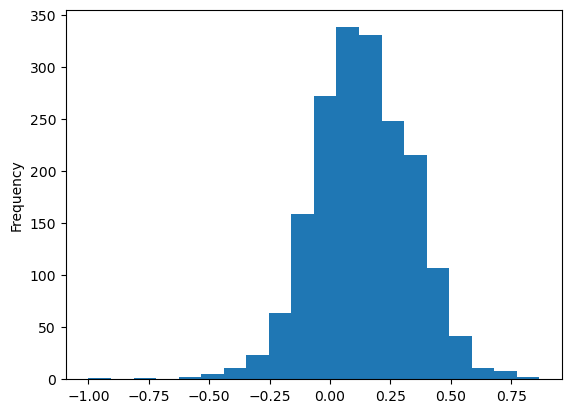

In [138]:
# Calculate statistics on sentiment polarity
mean_polarity = df['Sentiment Polarity'].mean()
max_polarity = df['Sentiment Polarity'].max()
min_polarity = df['Sentiment Polarity'].min()

# Print the statistics
print("Mean Sentiment Polarity:", mean_polarity)
print("Max Sentiment Polarity:", max_polarity)
print("Min Sentiment Polarity:", min_polarity)

# Create a histogram of sentiment polarity
df['Sentiment Polarity'].plot(kind='hist', bins=20)


Mean Sentiment Subjectivity: 0.5142163992609934
Max Sentiment Subjectivity: 1.0
Min Sentiment Subjectivity: 0.0


<AxesSubplot:ylabel='Frequency'>

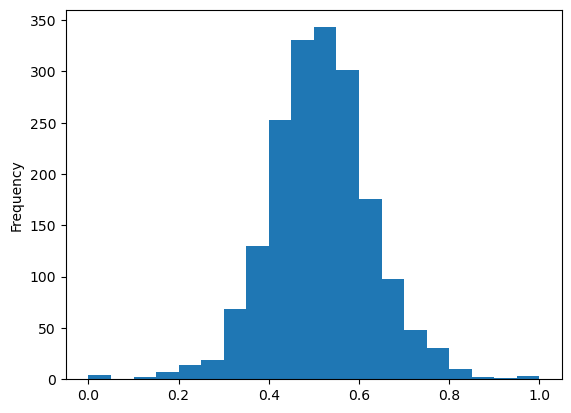

In [139]:
# Calculate statistics on sentiment subjectivity
mean_subjectivity = df['Sentiment Subjectivity'].mean()
max_subjectivity = df['Sentiment Subjectivity'].max()
min_subjectivity = df['Sentiment Subjectivity'].min()

# Print the statistics
print("Mean Sentiment Subjectivity:", mean_subjectivity)
print("Max Sentiment Subjectivity:", max_subjectivity)
print("Min Sentiment Subjectivity:", min_subjectivity)

# Create a histogram of sentiment subjectivity
df['Sentiment Subjectivity'].plot(kind='hist', bins=20)



#Based on the above analysis of the text reviews:

Mean Sentiment Polarity: 0.1364

The mean sentiment polarity is slightly positive (0.1364), indicating that, on average, the customer reviews tend to have a positive sentiment.
Max Sentiment Polarity: 0.8667

The maximum sentiment polarity is 0.8667, which suggests that some customer reviews are highly positive.
Min Sentiment Polarity: -1.0

The minimum sentiment polarity is -1.0, indicating that there are reviews with highly negative sentiment as well.
Mean Sentiment Subjectivity: 0.5142

The mean sentiment subjectivity is 0.5142, which is slightly above the midpoint (0.5) on the subjectivity scale. This suggests that, on average, the customer reviews contain a fair amount of subjective or opinion-based content.
Max Sentiment Subjectivity: 1.0

The maximum sentiment subjectivity is 1.0, indicating that some reviews are entirely subjective and opinion-based.
Min Sentiment Subjectivity: 0.0

The minimum sentiment subjectivity is 0.0, suggesting that there are reviews with little to no subjectivity, meaning they are more factual and objective.

Conclusions:

The majority of customer reviews tend to have a slightly positive sentiment, but there is a wide range of sentiment polarity in the dataset, including highly positive and highly negative reviews.
The reviews also vary in subjectivity, with some being highly subjective and opinion-based while others are more objective.
It's important to analyze the context and content of the reviews in addition to sentiment and subjectivity scores to gain a deeper understanding of customer feedback.
These statistics provide a high-level overview of sentiment and subjectivity in the reviews, but more in-depth analysis and context-specific insights may be necessary to draw meaningful conclusions or make decisions based on customer feedback.